## Build a Bear Workshops vs the S&P 500

While scrolling on social media recently, I came across a post with a surprising assertion. Build a Bear Workshop Inc. consistently outerperforms leading tech and AI companies in the S&P 500, including giants such as Nvidia and Palantir.

This project aims to examine the accuracy of that assertion and explore the underlying factors that may explain such performance.

-----

In [48]:
import matplotlib.pyplot as plt 
import pandas as pd 
import yfinance as yf

The companies that will be used in the initial analysis are tech & AI giants **Nvidia, Palantir, Meta, Alphabet and Microsoft.**

- **Nvidia** and **Palantir** are fast growing stocks that have soared astronmically as a result of AI hype.
- In comparison, **Microsoft**, **Meta**, and **Alphabet** are all well established in the tech industry. 



In [ ]:
tickers = ['BBW', 'NVDA', 'PLTR', 'META', 'GOOG', 'MSFT']

# 5 years of closing data for each ticker
stock_data = yf.download(tickers, start= "2020-09-30", end = None, auto_adjust= True)["Close"] # start date is palantir's IPO date
#clean_data = stock_data.dropna() # remove empty tables

stock_data.head()  # previewing data for testing

[*********************100%***********************]  6 of 6 completed


Ticker,BBW,GOOG,META,MSFT,NVDA,PLTR
Date,,,,,,
2020-09-30,2.129917,72.980568,260.471008,201.669754,13.489324,9.50
2020-10-01,2.351428,73.998108,265.175201,203.712021,13.573066,9.46
2020-10-02,2.342909,72.425369,258.521729,197.700211,13.022497,9.20
2020-10-05,2.394027,73.795998,263.206055,201.717667,13.600983,9.03
2020-10-06,2.368468,72.178062,257.248718,197.431747,13.694695,9.90


### Normalizing and Visualizing Stock Prices 
Obviously, the price of Build a Bear stock is not comparable to the stock of Microsoft. To account for this, we need to normalize each stock so that they all start at a baseline of 100 on the same start date.

This sets a reference point to compare and visualize relative performance.

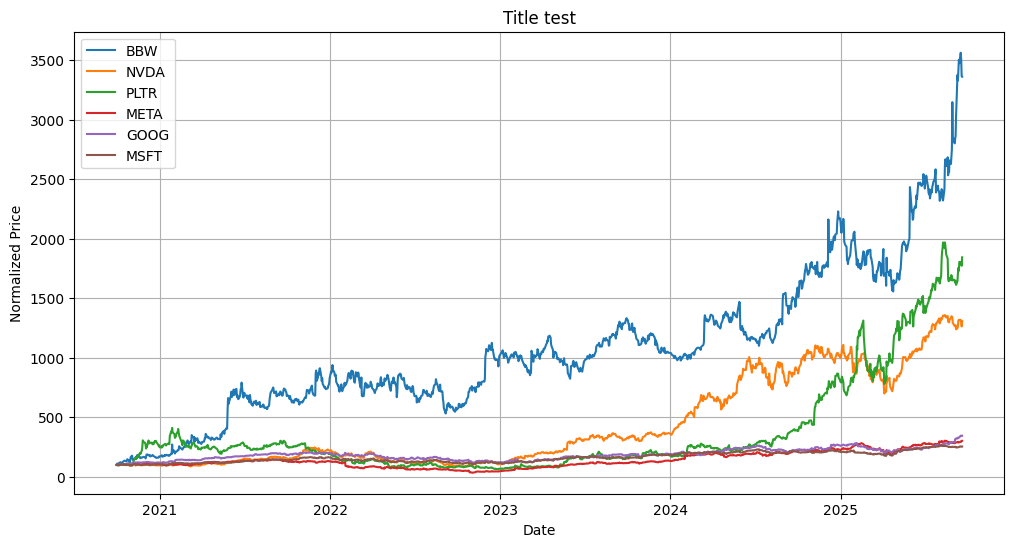

Total Returns Since 2020-09-30:

BBW: 3259.52%
GOOG: 244.06%
META: 201.32%
MSFT: 153.49%
NVDA: 1206.92%
PLTR: 1742.95%
BBW Start Price: $2.13
BBW End Price: $71.56


In [ ]:
normalized = (stock_data/ stock_data.iloc[0]) * 100

plt.figure(figsize=(12,6))
for ticker in tickers:
   plt.plot(normalized[ticker], label = ticker)

#print(stock_data.columns)

plt.title("Title test")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()

# Percentages for testing
returns = (stock_data.iloc[-1] / stock_data.iloc[0] - 1) * 100
print("Total Returns Since 2020-09-30:\n")
for ticker, ret in returns.items():
    print(f"{ticker}: {ret:.2f}%")

print(f"BBW Start Price: ${stock_data['BBW'].dropna().iloc[0]:.2f}")
print(f"BBW End Price: ${stock_data['BBW'].dropna().iloc[-1]:.2f}")